# Stage LIESSE – TP 1 – Régressions linéaire et logistique

Le but de ce notebook est de présenter la régression linéaire et la régression logistique.

## Chargement des librairies

__Numpy, matplotlib et pandas__

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [3]:
import pandas as pd

__Scikit-learn__

[Scikit-learn](http://scikit-learn.org) est le module Python par excellence pour les algorithmes de machine learning classiques. 

In [4]:
import sklearn

## 1. Régression linéaire

### Chargement des données

Nous allons travailler sur le Problème 1 défini dans le notebook `0-Donnees.ipynb`. Chargeons de nouveau les données, de la même manière que dans ce notebook.

In [5]:
penguins = pd.read_csv("data/penguins.csv")

In [6]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].to_numpy()
y_regress = penguins["body_mass_g"]

### Formalisme 

Nous disposons de $n$ observations en $p$ dimensions, représentés par une matrice $X \in \mathbb{R}^{nxp}$ (ici, $p=3$), et d'un vecteur d'étiquettes $\boldsymbol{y} \in \mathbb{R}^{n}$. Le but d'une régression linéaire est d'apprendre une fonction linéaire,

$$f: \boldsymbol{x} \in \mathbb{R}^p \mapsto \beta_0 + \boldsymbol{\beta}^\top \boldsymbol{x},$$

où $\beta_0 \in \mathbb{R}$ et $\boldsymbol\beta \in \mathbb{R}^p$.

Pour ce faire, on __minimise le risque empirique__, calculé avec l'__erreur quadratique__ $(y, f(\boldsymbol{x})) \mapsto \left(y - f(\boldsymbol{x}) \right)^2 $ comme fonction de perte. 

Il s'agit donc de trouver $\beta_0, \boldsymbol{\beta}$ qui minimisent
$$ J(\beta_0, \boldsymbol{\beta}) = \frac1n \sum_{i=1}^n \left(y_i - (\beta_0 + \boldsymbol{\beta}^\top \boldsymbol{x}_i))\right)^2.$$

Récupérons les valeurs de $n$ (`n_samples`) et $p$ (`n_features`) :

In [7]:
n_samples, n_features = X.shape

In [8]:
print("Nous avons n=%d observations et p=%d variables." % (n_samples, n_features))

Nous avons n=333 observations et p=3 variables.


### Régression linéaire avec scikit-learn

Nous allons maintenant utiliser `scikit-learn` pour trouver $\beta_0, \boldsymbol{\beta}$ qui minimisent $J$.

En machine learning, on parle d'__apprendre__ le modèle $f$.

Les modèles linéaires sont implémentés dans le module [`linear_model`](https://scikit-learn.org/stable/modules/linear_model.html). La régression linéaire elle-même est implémentée dans la classe `linear_model.LinearRegression`. Vous pouvez consulter la documentation de cette classe [ici](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [9]:
from sklearn import linear_model

L'entraînement d'un modèle d'apprentissage suit toujours la même logique dans `scikit-learn` : 
1. On instancie un objet de la classe de modèle qui nous intéresse, ici `LinearRegression`

In [10]:
linreg = linear_model.LinearRegression()

2. Puis on entraîne cet objet sur les données avec la méthode `fit` :

In [11]:
linreg.fit(X, y_regress)

LinearRegression()

3. On peut accéder au modèle entraîné via des attributs de cet objet. Ici, les paramètres du modèle appris sont accessibles via les attributs `intercept_` (pour $\beta_0$) et `coef_` (pour $\boldsymbol{\beta}$) :

In [12]:
print("Le poids (g) d'un manchot est prédit par %.2f " % linreg.intercept_, end='')
print("+ %.2f x bill_length_mm + %.2f x bill_depth_mm + %.2f x flipper_length_mm" % (tuple(linreg.coef_)))

Le poids (g) d'un manchot est prédit par -6445.48 + 3.29 x bill_length_mm + 17.84 x bill_depth_mm + 50.76 x flipper_length_mm


4. Enfin, on peut utiliser le modèle entraîné pour faire des prédictions en utilisant la méthode `predict` :

In [13]:
y_pred = linreg.predict(X)

### Performance du modèle

On peut maintenant s'intéresser à la qualité du modèle. Commençons par visualiser la corrélation entre les valeurs réelles et les valeurs prédites :

Text(0, 0.5, 'Poids prédit (g)')

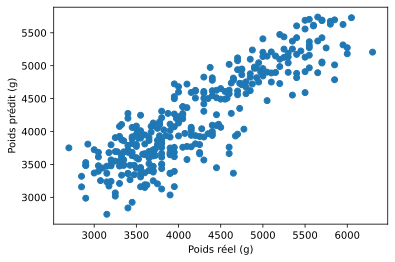

In [14]:
plt.scatter(y_regress, y_pred)

plt.xlabel("Poids réel (g)")
plt.ylabel("Poids prédit (g)")

`scikit-learn` nous permet aussi de quantifier la qualité du modèle grâce à différents scores, que l'on trouve dans le module `metrics`.

In [15]:
from sklearn import metrics

Pour un problème de régression, les métriques disponibles sont listées [ici](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

Nous allons utiliser ici la racine carrée de l'erreur quadratique moyenne, ou _RMSE_ pour _Root Mean Squared Error_, implémentée dans [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) :

In [16]:
print("La RMSE de notre modèle est %.2f g" % (metrics.mean_squared_error(y_regress, y_pred, squared=False)))

La RMSE de notre modèle est 390.64 g


Attention ! Une erreur d'estimation de 400g n'a pas le même sens selon que l'on parle d'individus pesant plutôt 500g, 5kg ou 50kg.

Nous pouvons aussi regarder la corrélation, donnée par le coefficient de détermination $R^2$, implémenté dans [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).

In [17]:
print("Le coefficient de détermination de notre modèle est R2 = %.2f" % (metrics.r2_score(y_regress, y_pred)))

Le coefficient de détermination de notre modèle est R2 = 0.76


## 2. Utilisation d'un jeu de test

Les mesures de performance calculées ci-dessus nous permettent de savoir à quel point le modèle « colle » bien aux données.

Cependant, elles ne nous informent pas sur la __capacité du modèle à généraliser__, c'est-à-dire à prédire le poids d'un manchot qui ne fasse pas partie de ce jeu de données. C'est cependant ce qui nous intéresse en apprentissage. 

L'évaluation que nous venons de faire est analogue à poser un examen contenant uniquement des exercices déjà traités en classe : les élèves peuvent réussir cet examen et être tout à fait incapables de résoudre un nouveau problème faisant appel aux mêmes notions.

C'est pourquoi on préfère évaluer la performance d'un modèle sur des données qu'il n'a jamais vues auparavant. Pour ce faire, nous allons mettre de côté une partie de nos données, appelées le __jeu de test__, que nous utiliserons uniquement pour l'évaluation. Pensez-y comme à un DS. Nous entraînerons le modèle sur le reste des données, appelé __jeu d'entraînement__.

### Séparation des données en jeu d'entraînement et jeu de test

Le module [`model_selection`](https://scikit-learn.org/dev/modules/classes.html?highlight=model_selection) de `scikit-learn` propose de nombreuses fonctionalités pour séparer des jeux de données en jeu d'entraînement et jeu de test (ainsi que des modes d'évaluation plus élaborés).

Ici nous utilisons `train_test_split` pour séparer les données en un jeu d'entrainement `(X_train, y_train)` contenant 70% des données et un jeu de test `(X_test, y_test)` contenant les 30% restant.

In [18]:
from sklearn import model_selection

In [19]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y_regress, 
                                                                      test_size=0.3, random_state=25)

Le paramètre `random_state` nous permet de fixer la graine du générateur de nombres aléatoires. La valeur choisie n'a aucun intérêt, mais permet de garantir que si nous réutilisons cette graine à un autre endroit de notre session, nous obtiendrons de nouveau la même séparation en jeu d'entraînement et jeu de test.

In [20]:
y_test

6      4675.0
237    5650.0
297    3350.0
124    3325.0
105    4600.0
        ...  
69     4250.0
258    5850.0
43     4150.0
60     3350.0
149    5700.0
Name: body_mass_g, Length: 100, dtype: float64

Nous pouvons vérifier le nombre d'observations et de variables dans chacun de ces jeux :

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((233, 3), (233,), (100, 3), (100,))

In [22]:
print("Le jeu d'entraînement contient %d observations et le jeu de test %d observations." % (X_train.shape[0], X_test.shape[0]))

Le jeu d'entraînement contient 233 observations et le jeu de test 100 observations.


### Régression linéaire sur le jeu d'entraînement

Nous pouvons maintenant entraîner une régression linéaire sur le jeu d'entraînement uniquement :

In [23]:
linreg.fit(X_train, y_train)

LinearRegression()

### Performance sur le jeu de test

Nous évaluons maintenant la qualité de ce modèle sur le jeu de test :

In [24]:
y_test_pred = linreg.predict(X_test)

Text(0.5, 1.0, 'Prédictions de la régression linéaire sur le jeu de test')

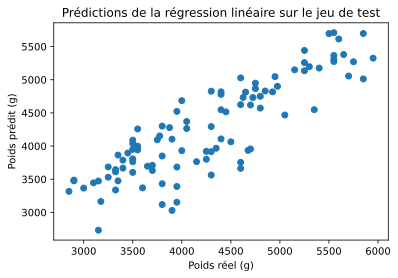

In [25]:
plt.scatter(y_test, y_test_pred)

plt.xlabel("Poids réel (g)")
plt.ylabel("Poids prédit (g)")

plt.title("Prédictions de la régression linéaire sur le jeu de test")

In [26]:
print("La RMSE de notre modèle est %.2f g" % (metrics.mean_squared_error(y_test, y_test_pred, squared=False)))

La RMSE de notre modèle est 411.80 g


In [27]:
print("Le coefficient de détermination de notre modèle est R2 = %.2f" % (metrics.r2_score(y_test, y_test_pred)))

Le coefficient de détermination de notre modèle est R2 = 0.74


Ces valeurs sont très proches de celles obtenues sur le jeu d'entraînement ; nous pouvons en conclure qu'il n'y a vraisemblablement pas de sur-apprentissage.

## 3. Régression logistique

### Chargement des données

Nous allons maintenant travailler sur le Problème 2 défini dans le notebook `0-Donnees.ipynb`. Il s'agit d'un problème de __classification__ sur la même matrice de données $X$ que précédement, mais avec des étiquettes _binaires_, que nous chargeons comme dans le notebook `0`.

In [28]:
y_classif = pd.Categorical(penguins["sex"]).astype('category').codes

### Séparation des données en jeu d'entraînement et jeu de test

Nous séparons dès maintenant ce jeu de données en un jeu d'entraînement et un jeu de test.

Dans le cas d'un problème de classification, nous allons __stratifier__ les données : cela signifie que nous allons faire en sorte de respecter les proportions relatives d'observations de chacune des classes dans chacun de nos jeux de données.

In [29]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y_classif, test_size=0.3, random_state=25, 
                                                                      stratify=y_classif)

### Formalisme 

Nous disposons toujours de $n$ observations en $p$ dimensions, représentés par une matrice $X \in \mathbb{R}^{nxp}$ (ici, $p=3$), et d'un vecteur d'étiquettes $\boldsymbol{y}$. Maintenant $\boldsymbol{y} \in \{0, 1\}^{n}$. 

Dans une régression logistique, on modélise la probabilité qu'une observation appartienne à la classe positive, autrement dit ait l'étiquette 1, par une transformation logistique d'une fonction linéaire des variables. Plus précisément, en notant $X$ un vecteur alétaoire réel $p$-dimensionnel qui modélise un manchot et $Y$ une variable aléatoire discrète à valeurs dans $\{0, 1\}$ qui modélise son étiquette, on modélise
$\mathbb{P}(Y = 1|X = \boldsymbol{x})$ par $f(\boldsymbol{x}),$ avec

$$f: \boldsymbol{x} \in \mathbb{R}^p \mapsto \sigma\left(\beta_0 + \boldsymbol{\beta}^\top \boldsymbol{x}\right),$$

où $\beta_0 \in \mathbb{R}$ et $\boldsymbol\beta \in \mathbb{R}^p$.

Pour trouver $\beta_0$ et $\boldsymbol\beta$, on a de nouveau recours à la __minimiation du risque empirique__, calculé avec la __perte logistique__ $(y, f(\boldsymbol{x})) \mapsto - y \log(f(\boldsymbol{x})- (1-y) \log(1-f(\boldsymbol{x}))$ comme fonction de perte. 

Il s'agit donc de trouver $\beta_0, \boldsymbol{\beta}$ qui minimisent
$$ J(\beta_0, \boldsymbol{\beta}) = \frac1n \sum_{i=1}^n - y_i \log(\sigma\left(\beta_0 + \boldsymbol{\beta}^\top \boldsymbol{x}_i\right)) - 
(1-y_i) \log(1-\sigma\left(\beta_0 + \boldsymbol{\beta}^\top \boldsymbol{x}_i\right)).$$ 

### Régression logistique avec scikit-learn

La régression logistique est implémentée dans la classe [`LogisticRegression` du module `linear_model`](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) de `scikit-learn`.

Nous utilisons une régression logistique « classique », sans pénalisation/régularisation. Il nous faut donc fixer l'argument `penalty` à `none`.

Nous suivons exactement les mêmes étapes que pour la régression linéaire :

1. Instancions un objet de la classe de modèle qui nous intéresse, ici `LogisticRegression`

In [30]:
logreg = linear_model.LogisticRegression(penalty='none')

2. Entraînons cet objet sur les données d'entraînement avec la méthode `fit` :

In [31]:
logreg.fit(X_train, y_train)

LogisticRegression(penalty='none')

3. Accédons au modèle entraîné via les attributs `intercept_` (pour $\beta_0$) et `coef_` (pour $\boldsymbol{\beta}$) :

In [32]:
print("La probabilité qu'un manchot soit mâle est prédite par sigma (%.2f " % logreg.intercept_[0], end='')
print("+ %.2f x bill_length_mm + %.2f x bill_depth_mm + %.2f x flipper_length_mm)" % (tuple(logreg.coef_[0])))

La probabilité qu'un manchot soit mâle est prédite par sigma (-62.71 + 0.15 x bill_length_mm + 1.50 x bill_depth_mm + 0.15 x flipper_length_mm)


4. Enfin, prédisons les étiquettes des données du jeu de test en utilisant la méthode `predict` :

In [33]:
y_test_pred = logreg.predict(X_test)

### Performance

Pour évaluer la performance d'un algorithme de classification, on peut regarder la __matrice de confusion__ des prédictions :

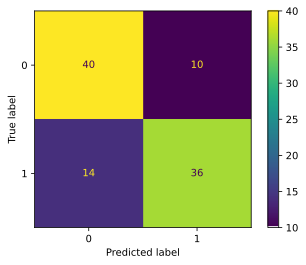

In [34]:
metrics.plot_confusion_matrix(logreg, X_test, y_test)

In [35]:
print("%d manchots mâles ont été incorrectement prédits femelle." % metrics.confusion_matrix(y_test, y_test_pred)[1, 0])
print("%d manchots femelles ont été incorrectement prédits mâles." % metrics.confusion_matrix(y_test, y_test_pred)[0, 1])

14 manchots mâles ont été incorrectement prédits femelle.
10 manchots femelles ont été incorrectement prédits mâles.


La performance globale du modèle peut aussi être mesurée par son __accuracy__, qui est la proportion de prédictions correctes.

Le terme _accuracy_ est généralement traduit par « précision », mais « précision » est aussi la traduction de _precision_, qui est le ratio de prédictions correctes parmi les prédictions positives, c'est-à-dire ici la proportion de manchots mâles parmi les manchots que le modèle a prédit être mâles.

In [36]:
print("%.f%% des prédictions du modèle sur le jeu de test sont correctes." % (100*metrics.accuracy_score(y_test, y_test_pred)))

76% des prédictions du modèle sur le jeu de test sont correctes.


__Attention !__ Si le nombre d'observations n'est pas le même dans chacune des classes, ce nombre peut être trompeur. Par exemple, si seulement 1% des observations appartiennent à la classe négative, un modèle naïf qui assigne toutes les observations à la classe positive aura une _accuracy_ de 99%.

## 4. Pour aller plus loin

### Annexe 1 : Régression linéaire univariée sans scikit-learn

Notre but ici va être d'inférer le poids d'un manchot à partir de la longueur de sa palette natatoire. Nous sommes donc dans le cas particulier où $p=1$.

In [37]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y_regress, 
                                                                      test_size=0.3, random_state=25)

In [38]:
x_3 = X_train[:, -1] # on ne garde que la dernière colonne/variable de X

Text(0, 0.5, 'Poids (g)')

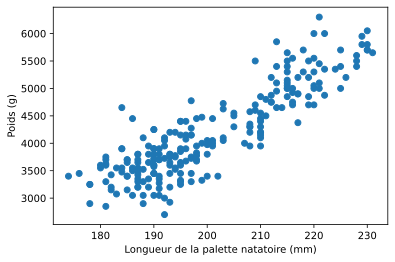

In [39]:
plt.scatter(x_3, y_train)
plt.xlabel("Longueur de la palette natatoire (mm)")
plt.ylabel("Poids (g)")

Il s'agit donc d'apprendre une fonction $f: x \mapsto a x + b$ telle que $y \approx f(x_3)$.

Ce problème se résout grâce à la méthode des moindres carrés : il s'agit de trouver $a, b$ qui minimisent $J(a, b) = \sum_{i=1}^n ((a x_i + b) - y_i)^2$. 

Il s'agit d'une forme quadratique, convexe, dont on trouve le minimum en annulant sa dérivée en $a$ et en $b$.

$\frac{\partial J}{\partial a} (a, b)= \frac1n \sum_{i=1}^n x_i^2 a + \frac1n \sum_{i=1}^n x_i b - \frac1n \sum_{i=1}^n x_i y_i$

et

$\frac{\partial J}{\partial b} (a, b)= b + \frac1n \sum_{i=1}^n x_i a - \frac1n \sum_{i=1}^n y_i$

Ce dont on déduit, à condition que $\frac1n \sum_{i=1}^n x_i^2 \neq \left(\frac1n \sum_{i=1}^n x_i\right)^2$,

$a = \frac{\frac1n \sum_{i=1}^n x_i y_i - \frac1n \sum_{i=1}^n x_i \frac1n \sum_{i=1}^n y_i}{\frac1n \sum_{i=1}^n x_i^2 - \left(\frac1n \sum_{i=1}^n x_i\right)^2}$ 

et

$b =  \frac1n \sum_{i=1}^n y_i - \frac1n \sum_{i=1}^n x_i a$.



Calculons les termes $\frac1n \sum_{i=1}^n x_i$, $\frac1n \sum_{i=1}^n x_i^2$, $\frac1n \sum_{i=1}^n y_i$, $\frac1n \sum_{i=1}^n x_i y_i$ :

In [40]:
x_mean = np.mean(x_3)
x2_mean = np.mean(x_3**2)
y_mean = np.mean(y_regress)
xy_mean = np.mean(x_3 * y_regress)

ValueError: operands could not be broadcast together with shapes (233,) (333,) 

Vérifions l'unicité de la solution : 

In [ ]:
x2_mean - x_mean**2

Calculons les coefficients de notre droite : 

In [ ]:
a = (xy_mean - x_mean * y_mean) / (x2_mean - x_mean**2)

In [ ]:
b = y_mean - a * x_mean

Nous pouvons maintenant ajouter notre droite de régression au graphique précédent :

In [ ]:
plt.scatter(x_3, y_train, label="Données")

x_3_min = np.min(x_3) - 5
x_3_max = np.max(x_3) + 5
plt.plot([x_3_min, x_3_max], [(a * x_3_min + b), (a * x_3_max + b)], lw=2, c='orange', label="Modèle")

plt.xlabel("Longueur de la palette natatoire (mm)")
plt.ylabel("Poids (g)")
plt.legend()

### Annexe 2 : Régression linéaire multivariée sans scikit-learn (forme close)

Nous allons maintenant utiliser nos trois variables.

Pour simplifier les notations, nous allons ajouter une colonnes de 1 à notre matrice $X$ :

$$
\underbrace{
\begin{bmatrix}
    x_{11} & x_{12} & \dots & x_{1p} \\
    x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}}_{X} \to
\underbrace{
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1p} \\
    1 & x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}}_{\text{$X$ with bias variable}}
$$

Ce qui nous permet de noter le modèle de la façon suivante :
$f: \boldsymbol{x} \in \mathbb{R}^{p+1} \mapsto \boldsymbol{\beta}^\top \boldsymbol{x}$ with $\boldsymbol{\beta} \in \mathbb{R}^{p+1}$.

In [ ]:
X_ones = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

La minimisation du risque empirique s'écrit alors
$$\boldsymbol{\beta}^* \in \arg\min \frac{1}{n}\sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^\top \boldsymbol{x}_i \right)^2 = \frac{1}{n}\left(\boldsymbol{y} - X \boldsymbol\beta\right)^\top(\boldsymbol{y} - X\boldsymbol\beta)$$

C'est un problème d'optimisation convexe, que l'on résout en annulant le gradient de la fonction à minimiser.

On obtient alors que la solution $\boldsymbol\beta^*$ vérifie
$(X^\top X) \boldsymbol\beta^* =  X^\top \boldsymbol{y}.$

__Si $X^\top X$ est inversible__, on obtient une unique solution
$\boldsymbol\beta^* = (X^\top X)^{-1} X^\top \boldsymbol{y}.$

In [ ]:
beta_star = np.dot(np.linalg.inv(np.dot(X_ones.T, X_ones)), np.dot(X_ones.T, y_train))

In [ ]:
print("Le poids (g) d'un manchot est prédit par %.2f + %.2f x bill_length_mm + %.2f x bill_depth_mm + %.2f x flipper_length_mm" % (tuple(beta_star)))

### Annexe 3 : Régression logistique sans scikit-learn

Dans le cas de la régression logistique, la minimisation du risque empirique revient à minimiser

$$J(\boldsymbol\beta) = \frac1n \sum_{i=1}^n - y_i \log(\sigma(\boldsymbol\beta^\top \boldsymbol{x}_i))- (1-y_i) \log(1-\sigma(\boldsymbol\beta^\top \boldsymbol{x}_i))  $$

Comme $\sigma^\prime(u) = \sigma(u) (1-\sigma(u))$, on obtient comme gradient pour $J$ :
$$\nabla J(\boldsymbol\beta) = - \frac1n \sum_{i=1}^n \left(y_i - \sigma(\boldsymbol\beta^\top \boldsymbol{x}_i) \right) \boldsymbol{x}_i$$

Cependant, il n'existe pas de solution explcite à 
$$\frac1n \sum_{i=1}^n \left(y_i - \sigma(\boldsymbol\beta^\top \boldsymbol{x}_i) \right) \boldsymbol{x}_i = 0,$$
we do not have a closed-form solution.

Nous avons donc recours à la méthode du gradient.

La __méthode du gradient__ permet d'obtenir une solution en progressant itérativement dans la direction opposée au gradient de la fonction à minimiser. Plus précisément, à chaque itération $t$, le vecteur $\boldsymbol\beta$ est mis à jour par :
$$\boldsymbol\beta^{(t+1)} = \boldsymbol\beta^{(t)} - \alpha \nabla_{\boldsymbol\beta} J(\boldsymbol\beta^{(t)}).$$
où $J: \mathbb{R}^d \rightarrow \mathbb{R} $ est la fonction à minimiser.

Dans le cas de la régression linéaire, $d=p+1$ et $J(\boldsymbol\beta) = \frac{1}{n}\left(\boldsymbol{y} - X \boldsymbol\beta\right)^\top(\boldsymbol{y} - X\boldsymbol\beta).$

$\alpha$ est le __pas__ de la descente de gradient ; en apprentissage, on parle de __vitesse d'apprentissage__ (_learning rate_ en anglais).

On arrête d'itérer :
* soit quand un nombre prescrit d'itérations est atteint ;
* soit quand la norme du gradient est moins qu'un seuil prescrit, appelé __tolérance__.

C'est la méthode que nous allons mettre en œuvre.

#### Calcul du gradient

In [ ]:
def sigmoid(u):
    """
    Fonction sigmoide.
    
    Paramètres :
    ------------
    u: float
       Nombre réel.
    """
    return (1./(1+np.exp(-u)))

In [ ]:
def logistic_loss(X, y, b_vector):
    """
    Risque empirique pour une régression logistique.
    
    Paramètres
    ----------    
    X: (n_samples, n_features+1) numpy array
        La matrice de données.
        
    y: (n_samples, ) numpy array 
        Le vecteur d'étiquettes
        
    b_vector: (n_features+1, ) numpy array
        Le vecteurs de coefficients de la régression logistique
    """
    # Partie du risque correspondant aux étiquettes positives
    where_y_pos = np.where(y==1)[0]
    loss_pos = - np.sum(np.log(sigmoid(X[where_y_pos, :].dot(b_vector))))

    # Partie du risque correspondant aux étiquettes négatives    
    where_y_neg = np.where(y==0)[0]
    loss_neg = - np.sum(np.log(1 - sigmoid(X[where_y_neg, :].dot(b_vector))))
    
    return (loss_pos + loss_neg)/np.size(y)

In [ ]:
def evaluate_gradient_logistic(X, y, b_vector):
    """ 
    Gradient du risque empirique de la régression logistique
    
    Paramètres
    ----------    
    X: (n_samples, n_features+1) numpy array
        La matrice de données.
        
    y: (n_samples, ) numpy array 
        Le vecteur d'étiquettes
        
    b_vector: (n_features+1, ) numpy array
        Le vecteurs de coefficients de la régression logistique
    """
    num_samples = X.shape[0]
    diff = sigmoid(X.dot(b_vector)) - y 
    return np.sum(np.multiply(diff, X.T), axis=1)/num_samples

#### Méthode du gradient

In [ ]:
def gradient_descent_logistic(X, y, learning_rate=1e-1, max_iters=30, tol=1e-2):
    """
    Méthode du gradient pour la régression logistique.    
    
    Paramètres
    ----------    
    X: (n_samples, n_features+1) numpy array
        La matrice de données.
        
    y: (n_samples, ) numpy array 
        Le vecteur d'étiquettes
        
    learning_rate: float
        La vitesse d'apprentissage
        
    max_iters: int
        Le nombre maximal d'itérations
        
    tol: float
        La tolérance
    """
    # Initialisation aléatoire des coefficients de régression
    beta_current = np.random.rand(X.shape[1])
    #beta_current = np.hstack((10*np.random.rand(1), np.random.rand(X.shape[1]-1)))
    
    # Liste pour stocker les valeurs de la fonction de perte
    # à chaque itération
    losses = [logistic_loss(X, y, beta_current)]    
    # Liste pour stocker les valeurs des coefficients de régression
    # à chaque itération
    betas = [beta_current.copy()]

    for i in range(max_iters):            
        # Mise à jour de beta_current
        gradient = evaluate_gradient_logistic(X, y, beta_current) 
        beta_current = beta_current - learning_rate * gradient
        
        # Ajouter la fonction de perte à la liste losses
        losses.append(logistic_loss(X, y, beta_current))
        
        # Ajouter la valeur des coefficients de régression à la liste betas
        betas.append(beta_current.copy())

        # Vérifier si la tolérance est atteinte
        if np.linalg.norm(gradient) < tol: 
            break

    return(np.array(losses), betas)

#### Application aux données

In [ ]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y_classif, test_size=0.3, random_state=25, 
                                                                      stratify=y_classif)

In [ ]:
X_ones = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

In [ ]:
tolerance = 1e-4
iterations = 35
lr = 2e-4
losses, betas = gradient_descent_logistic(X_ones, y_train, learning_rate=lr, max_iters=iterations, tol=tolerance)

In [ ]:
plt.plot(np.arange(len(losses)), losses, 'o-')

plt.xlabel("number of iterations")
plt.ylabel("value of the loss")
plt.title("Batch gradient descent")

In [ ]:
print("La probabilité qu'un manchot soit mâle est prédite par sigma(", end='')
print("%.2f + %.2f x bill_length_mm + %.2f x bill_depth_mm + %.2f x flipper_length_mm)" % (tuple(betas[-1])))

__Remarque :__ Le risque empirique est infini à l'initialisation, d'où un `RuntimeWarning: divide by zero encountered in log`. En pratique, cette approche pourrait être améliorée par :
* un pré-traitement des données consistant à centrer-réduire chaque variable ;
* l'utilisation d'un taux d'apprentissage variable (élevé au début, plus faible à la fin).

#### Performance

In [ ]:
X_test_ones = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [ ]:
y_test_pred = np.where(sigmoid(X_test_ones.dot(betas[-1])) > 0.5, 1, 0)

In [ ]:
confusion_matrix_display = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_test_pred))
confusion_matrix_display.plot()

In [ ]:
print("%d manchots mâles ont été incorrectement prédits femelle." % metrics.confusion_matrix(y_test, y_test_pred)[1, 0])
print("%d manchots femelles ont été incorrectement prédits mâles." % metrics.confusion_matrix(y_test, y_test_pred)[0, 1])

In [ ]:
print("%.f%% des prédictions du modèle sur le jeu de test sont correctes." % (100*metrics.accuracy_score(y_test, y_test_pred)))

__Remarque :__ On confirme ici que la procédure de descente de gradient que nous avons implémentée n'est pas optimale.